# Python Tutorial 06 - Importing and Exporting Data Tables
## M. Virginia McSwain (Lehigh University; mcswain@lehigh.edu)

## Table of contents
* [File Formats](#formats)
* [Reading Data Files (Method 1 - Numeric data only)](#reading1)
* [Reading Data Files (Method 2 - Mixture of numbers and text)](#reading2)
* [Reading Data Files (Method 3 - Spreadsheets)](#reading3)
* [Writing Data to a Text File](#writing)
* [Writing Data to a Spreadsheet](#writing2)

<a class="anchor" id="formats"></a>
## File Formats

You’ll often find the need to interpret large data tables, whether you're doing astronomy research or business data analytics.  Using a code like Python is an easy way to manage large data sets!

Python can read in many file formats, and there are existing tools to handle every format imaginable.  Common spreadsheet data might be in Microsoft Excel (.xlsx) or a "comma separated value" (.csv) format.  Professional astronomers often share images or tables within the Flexible Image Transport System (.fits) format.  The possibilities are nearly endless!  We will not discuss all of these formats today, but it helps to know that they exist and that there are tools for handling them in Python. 

Generally the simplest file format is plain text (often called ascii, UniCode, or .txt files).  These are easily readable but unformatted - no fancy fonts or special features.  Data tables in the plain text format usually use spaces to separate columns of fixed-width data. (Warning: historically it was bad practice to use tabs to separate data columns in plain text.)

Notepad (Windows) and TextEdit (Mac) are common programs to read and edit text files.  Make sure you turn off any formatting features (these tend to produce hidden characters that will screw up your code) and save your work as plain text.  


<a class="anchor" id="reading1"></a>
## Reading Text Files (Method 1 - Numeric data only)

Open the file ‘sampledata.txt’ with your preferred text editor program...  Inspect the file to see how the plain text is formatted.

In this file, there are only 2 columns of numbers.  There is no text header with any explanation.  

Below, we will use Python to open the file and import the data.

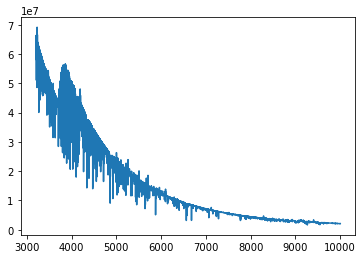

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# if necessary, go to the directory where the file is saved
dir = 'Example Data Files/'  # use your own directory

# read in the text file
data = np.loadtxt(dir+'sampledata.txt')
x=data[:,0]     # saves the first column to variable x
y=data[:,1]
plt.plot(x,y)
plt.show()


<a class="anchor" id="reading2"></a>
## Reading Text Files (Method 2 - Mixture of numbers and text)

Open the file ‘sampleascii.txt’ with your preferred text editor program...

In this file, the first 4 rows are dedicated to a brief explanation of the file's contents.  These informational rows are called "headers".  

When there is a mixture of numbers and letters within a data table, you may need to parse the data differently than if there are only numbers.  This technique will work for such a mixture.

Here, x is saved as a list of floats:
[-4.533994, -4.52923, -4.519698, -4.500647, -4.462521, -4.386192, -4.238417, -4.090806, -3.943237, -3.795703, -3.648205, -3.500749, -3.353314, -3.205885, -3.058445, -2.910941, -2.763346, -2.615244, -2.4673, -2.320107, -2.173091, -2.036905, -1.929798, -1.842859, -1.769753, -1.706534, -1.65076, -1.601197, -1.560947, -1.530602, -1.503803, -1.477004, -1.436723, -1.373847, -1.283611, -1.1598, -1.011298, -0.8637096, -0.7162447, -0.5688584, -0.4215158, -0.2741887, -0.1268464, 0.02056348, 0.1680442, 0.3156238, 0.4632857, 0.6108858, 0.7583441, 0.9056986, 1.052996, 1.200277, 1.34763, 1.494999, 1.642249, 1.790529, 1.910507, 1.962778, 1.988894, 1.997593]

Here, z is saved as a list of strings:
['7.608605E-01', '7.618946E-01', '7.639828E-01', '7.682432E-01', '7.771487E-01', '7.969704E-01', '8.457529E-01', '9.111671E-01', '9.896839E-01', '1.069130E+00', '1.139061E+00', '1.200021E+00', '1.259209E+00', '1.318697E+00', '1.376097E+00', '1.430192E+00', '1.480172E+00'

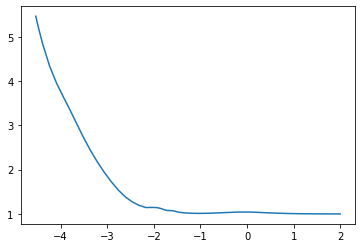

In [2]:
# import packages as necessary
import numpy as np
import matplotlib.pyplot as plt

# Open file
dir = 'Example Data Files/'
f = open (dir+'sampleascii.txt', 'r')

# If the file has header lines, skip them...  (This file has 4 lines of headers.)
# If there are many lines of headers, it might be preferable to do this in a loop instead.
header1 = f.readline()
header2 = f.readline()
header3 = f.readline()
header4 = f.readline()


# Create blank lists to hold the data values
x=[]
y=[]
z=[]
another_variable=[]

# Loop over lines and extract variables of interest.  
# Note that numerical data might be imported as a string, so convert to a floating point if necessary.
for line in f:
    line = line.strip()
    columns = line.split()
    x.append(float(columns[0]))
    y.append(float(columns[1]))
    z.append(columns[2])          # z was not converted to a float
    another_variable.append(columns[3])

    
f.close()

print ("Here, x is saved as a list of floats:")
print (x)
print ("")
print ("Here, z is saved as a list of strings:")
print (z)

# plot the 2 data columns
plt.plot(x, y)
plt.show()

<a class="anchor" id="reading3"></a>
## Reading Data Files (Method 3 - Spreadsheets/csv files)

Since Python is far more powerful than Excel, you may find it useful to open up spreadsheets in this environment using the ``Pandas`` package.  Here is a link to <a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html">a more complete tutorial on using pandas</a>.  The ``Pandas`` package should also come pre-installed with your Anaconda distribution!

Note that .csv (comma separated value) files are a commonly used format for spreadsheets since they are not proprietary to a particular software package (eg. Microsoft Excel).  You can always convert a .xlsx file to the .csv format if necessary.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dir = 'Example Data Files/'
dataset = pd.read_csv(dir+'mooncraters.csv')
print (dataset)

     Feature_Name Target  Diameter (km)  Center_Latitude  Center_Longitude  \
0            Abbe   Moon          63.98           -57.58            174.77   
1           Abbot   Moon          10.40             5.56             54.74   
2         [Abduh]   Moon           0.00            14.70             39.00   
3            Abel   Moon         137.35           -34.63             85.78   
4        Abenezra   Moon          43.19           -20.99             11.89   
...           ...    ...            ...              ...               ...   
1614      Zöllner   Moon          47.69            -7.97             18.90   
1615    Zsigmondy   Moon          66.88            59.52           -105.30   
1616     Zucchius   Moon          63.18           -61.38            -50.65   
1617        Zupus   Moon          35.29           -17.18            -52.37   
1618       Zwicky   Moon         126.06           -16.17            167.64   

                      Coordinate_System Approval_Status Approva

Save your column of interest as a variable for further analysis...  All you need is the column header from the spreadsheet!

In [4]:
d = dataset['Diameter (km)']
print (d)

0        63.98
1        10.40
2         0.00
3       137.35
4        43.19
         ...  
1614     47.69
1615     66.88
1616     63.18
1617     35.29
1618    126.06
Name: Diameter (km), Length: 1619, dtype: float64


<a class="anchor" id="writing"></a>
## Writing Data to a Text File

Let's say you've been working hard with some data set or a new model, and you want to save all your calculations in a file to share with someone else.  In many cases, you might not want them messing around with your original program.  So just save the numbers!

In [5]:
# import packages as necessary
import numpy as np
import matplotlib.pyplot as plt

# Generate some fake data
x = np.arange(0, 10, 0.01)
y = x**2 + 3*x + 7

# Open a new file in "writing" mode.  See "help (open)" for other options.
dir = 'Example Data Files/'
file = open(dir+'newdata.txt','w')

# Make a string for each line you want to write.
# ‘\t’ means ‘tab’
# ‘\n’ means ‘new line’
# ‘str()’ means convert the quantity in parenthesis to a string

# Loop over each line you want in the file
for i in range(len(x)):
    txt = str(x[i]) + '\t' + str(y[i]) + '\n'    # recommended with reservations
    txt = str(x[i]) + '    ' + str(y[i]) + '\n'
    file.write(txt)

# Close the file when finished
file.close()

Note that using a tab instead of a few spaces separating the data values is not recommended by old-school programmers.  The TAB character is read as a single character by most older programs.  If I was using a fixed-width column format, the tab would cause me to miscount the number of characters between the data when I go back to read the file later.  The tab can cause unexpected errors and ruin your day!!!

<a class="anchor" id="writing2"></a>
## Writing Data to a Spreadsheet (csv file)

This method uses the `dictionary` variable type to write each data point in the correct column.  Make sure that your column headers are all unique!

Using `mode = 'w'` opens the new file in "write" mode, meaning that it will create a blank file with the name you chose, and it will write the new data to that empty file.  If you need to append data to an existing spreadsheet, open it using `mode = 'a'` instead.

Your new spreadsheet can be opened within Microsoft Excel or any other spreadsheet software.

In [1]:
import csv

# some arbitrary data
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
c = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

dir = 'Example Data Files/'

with open(dir+'newfilename.csv', mode='w') as csv_file:
    fieldnames = ['Column Header A', 'Column Header B', 'Column Header C']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    for i in range(len(a)):       
        writer.writerow({'Column Header A': a[i], \
                         'Column Header B': b[i], \
                         'Column Header C': c[i] })